### Credit Card Fraud Detection Project - Random Forest

## Install Libraries

In [2]:
import pandas as pd
import numpy as np

# from config import CSV_FILE_URL
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier

In [4]:
# Read the .csv file into a dataframe.

df = pd.read_csv('creditcard.csv')
df.shape

(284807, 31)

In [5]:
# We check if null exists.

df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Exploring Data

In [6]:
# 'Class' is target variable.

df.groupby('Class').count()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,...,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315
1,492,492,492,492,492,492,492,492,492,492,...,492,492,492,492,492,492,492,492,492,492


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


<AxesSubplot:xlabel='Class'>

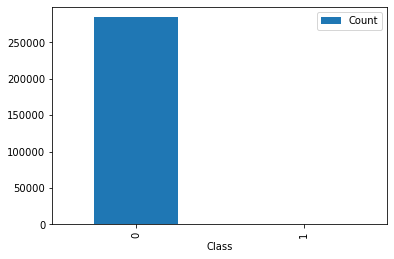

In [8]:
# '0' indicates no fraud; '1' fraud transactions.

grouped_df = df[['Class','Time']].groupby('Class').count()
grouped_df = grouped_df.rename(columns={"Time":"Count"})
grouped_df.plot(kind="bar")

In [14]:
# It is evident from the above plot that data is highly imbalanced. The dataset has only 492 fraudulent transactions out of a total of 284807 transactions, which is a mere 0.17%.

## Defining features (independent variables)

In [9]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
# Selecting predictor features. This will be used as x values.

selected_features = df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
selected_features.shape

(284807, 30)

In [11]:
# Defining features and target variables to X and y, respectively.
# Note: Sklearn requires a two-dimensional array of values.
# So we use reshape to create this.

X = selected_features
y = df[['Class']].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (284807, 30) (284807, 1)


## Train-Test Split

In [12]:
# We use 'train_test_split' to split the data into train and test datasets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [13]:
print("Shape: ", X_train.shape, y_train.shape, X_test.shape, y_test.shape)

Shape:  (213605, 30) (213605, 1) (71202, 30) (71202, 1)


## Data Pre-processing

In [18]:
# We scale the data using the MinMaxScaler.

X_minmax = MinMaxScaler().fit(X_train)

X_train_scaled = X_minmax.transform(X_train)
X_test_scaled = X_minmax.transform(X_test)

## Random Forest Classifier Model

In [22]:
# We train our model.
# n_estimatoirs refers to the number of trees in the forest.

random_Tree_Model = RandomForestClassifier(n_estimators=200)
random_Tree_Model

RandomForestClassifier(n_estimators=200)

In [23]:
random_Tree_Model.fit(X_train_scaled, y_train.flatten())

RandomForestClassifier(n_estimators=200)

In [24]:
print(f"Training Data Score: {random_Tree_Model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {random_Tree_Model.score(X_test_scaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.999592708069998


In [25]:
# Our model makes predictions.

random_Tree_Pred = random_Tree_Model.predict(X_test_scaled)

In [26]:
random_Tree_Pred_Proba = random_Tree_Model.predict_proba(X_test_scaled)[:,1]

Random Forest Classifier
Accuracy:  0.999592708069998
Precision:  0.9375
Recall:  0.7964601769911505
F1-Score:  0.861244019138756
AUC score:  0.8981878878738194
                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00     71089
    Fraudulent       0.94      0.80      0.86       113

      accuracy                           1.00     71202
     macro avg       0.97      0.90      0.93     71202
  weighted avg       1.00      1.00      1.00     71202



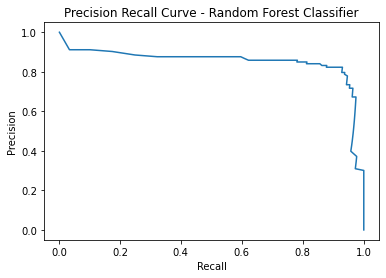

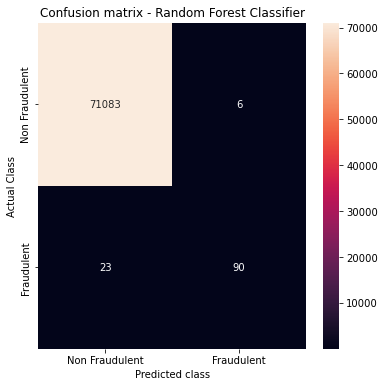

In [28]:
print("Random Forest Classifier")
print("========================")
print("Accuracy: ",accuracy_score(y_test.flatten(), random_Tree_Pred)) 
print("Precision: ",precision_score(y_test.flatten(), random_Tree_Pred))
print("Recall: ",recall_score(y_test.flatten(), random_Tree_Pred))
print("F1-Score: ",f1_score(y_test.flatten(), random_Tree_Pred))
print("AUC score: ",roc_auc_score(y_test.flatten(), random_Tree_Pred))
print(classification_report(y_test.flatten(), random_Tree_Pred,
                            target_names=["Non Fraudulent", "Fraudulent"]))
p, r, t = precision_recall_curve(y_test.flatten(), random_Tree_Pred_Proba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Random Forest Classifier')
confusion_Matrix = confusion_matrix(y_test.flatten(), random_Tree_Pred) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusion_Matrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Random Forest Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show()

## Hyperparameter Tuning

In [29]:
# We use GridSearch Cross Validation to tune our model's parameters.

random_Tree_Model.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [31]:
# Create the GridSearchCV model.
# Create the GridSearch estimator along with a parameter object containing the values to adjust.

random_Tree_Param_Grid = {'n_estimators': [100, 200],
                       'criterion': ['gini','entropy'],
                       'max_features': ['auto','sqrt','log2',None],
                      }
random_Tree_Grid = GridSearchCV(random_Tree_Model, random_Tree_Param_Grid, verbose=3)

In [32]:
# Train the model with GridSearch.

random_Tree_Grid.fit(X_train_scaled, y_train.flatten())

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END criterion=gini, max_features=auto, n_estimators=100;, score=1.000 total time= 2.0min
[CV 2/5] END criterion=gini, max_features=auto, n_estimators=100;, score=0.999 total time= 1.8min
[CV 3/5] END criterion=gini, max_features=auto, n_estimators=100;, score=0.999 total time= 1.9min
[CV 4/5] END criterion=gini, max_features=auto, n_estimators=100;, score=1.000 total time= 2.0min
[CV 5/5] END criterion=gini, max_features=auto, n_estimators=100;, score=1.000 total time= 1.9min
[CV 1/5] END criterion=gini, max_features=auto, n_estimators=200;, score=1.000 total time= 4.2min
[CV 2/5] END criterion=gini, max_features=auto, n_estimators=200;, score=0.999 total time= 3.9min
[CV 3/5] END criterion=gini, max_features=auto, n_estimators=200;, score=0.999 total time= 4.0min
[CV 4/5] END criterion=gini, max_features=auto, n_estimators=200;, score=1.000 total time= 4.4min
[CV 5/5] END criterion=gini, max_features=auto, n_estimat

GridSearchCV(estimator=RandomForestClassifier(n_estimators=200),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'n_estimators': [100, 200]},
             verbose=3)

In [33]:
print(random_Tree_Grid.best_params_)
print(random_Tree_Grid.best_score_)

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 100}
0.9995505723180637


In [34]:
# Making predictions using the hyperparameter tuned model.

random_Tree_Grid_Pred = random_Tree_Grid.predict(X_test_scaled)
random_Tree_Grid_Pred_Proba = random_Tree_Grid.predict_proba(X_test_scaled)[:,1]

In [35]:
# Print classification report:

print(classification_report(y_test.flatten(), random_Tree_Grid_Pred,
                            target_names=["Non Fraudulent", "Fraudulent"]))

                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00     71089
    Fraudulent       0.95      0.77      0.85       113

      accuracy                           1.00     71202
     macro avg       0.97      0.88      0.92     71202
  weighted avg       1.00      1.00      1.00     71202



Random Forest Classifier
Accuracy:  0.9995646189713772
Precision:  0.9456521739130435
Recall:  0.7699115044247787
F1-Score:  0.848780487804878
AUC score:  0.8849205850275929
                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00     71089
    Fraudulent       0.95      0.77      0.85       113

      accuracy                           1.00     71202
     macro avg       0.97      0.88      0.92     71202
  weighted avg       1.00      1.00      1.00     71202



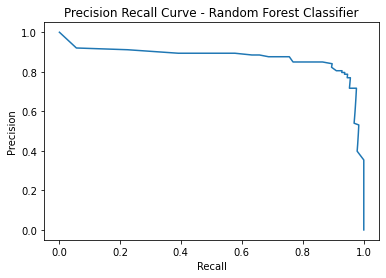

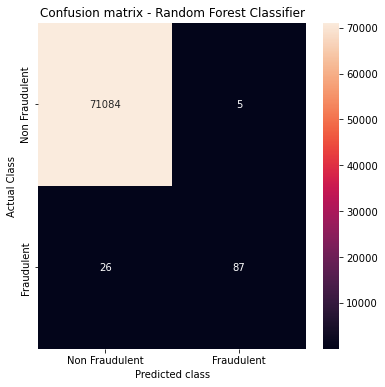

In [36]:
print("Random Forest Classifier")
print("========================")
print("Accuracy: ",accuracy_score(y_test.flatten(), random_Tree_Grid_Pred)) 
print("Precision: ",precision_score(y_test.flatten(), random_Tree_Grid_Pred))
print("Recall: ",recall_score(y_test.flatten(), random_Tree_Grid_Pred))
print("F1-Score: ",f1_score(y_test.flatten(), random_Tree_Grid_Pred))
print("AUC score: ",roc_auc_score(y_test.flatten(), random_Tree_Grid_Pred))
print(classification_report(y_test.flatten(), random_Tree_Grid_Pred,
                            target_names=["Non Fraudulent", "Fraudulent"]))
p, r, t = precision_recall_curve(y_test.flatten(), random_Tree_Grid_Pred_Proba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Random Forest Classifier')
confusion_Matrix = confusion_matrix(y_test.flatten(), random_Tree_Grid_Pred) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusion_Matrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Random Forest Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show()

## Feature Selection

In [37]:
feature_names = selected_features.columns
sorted(zip(random_Tree_Model.feature_importances_, feature_names), reverse=True)

[(0.17924556811391085, 'V17'),
 (0.13653486444770005, 'V14'),
 (0.12517864551555669, 'V12'),
 (0.0725443543111234, 'V11'),
 (0.06804145561477334, 'V10'),
 (0.06214257459306731, 'V16'),
 (0.03305174690101077, 'V9'),
 (0.03175134964783432, 'V7'),
 (0.031116801086375944, 'V18'),
 (0.027437530082555128, 'V4'),
 (0.016546387788898772, 'V26'),
 (0.016501331544042444, 'V3'),
 (0.014586916986787029, 'V21'),
 (0.013831116231356813, 'V1'),
 (0.0134628974942145, 'V27'),
 (0.01345495591186902, 'V20'),
 (0.012873904329007856, 'V5'),
 (0.012552003129726987, 'V19'),
 (0.01199127071670047, 'V15'),
 (0.011277764615149838, 'V6'),
 (0.010990355274739932, 'Time'),
 (0.010579655034818107, 'V2'),
 (0.010548580046380512, 'V13'),
 (0.01049985106736936, 'Amount'),
 (0.0094516860764531, 'V24'),
 (0.009252024253953845, 'V8'),
 (0.009214451035701843, 'V25'),
 (0.00919410655659388, 'V22'),
 (0.008763355159093471, 'V28'),
 (0.0073824964332345495, 'V23')]

## Choosing Top features

In [38]:
# Set top features. This will be used as x values (features).

top_features = df[[ 
'V17',
'V14',
'V12',
'V10',
'V11',
'V16',
'V9',
]]

top_features.head(1)

,V17,V14,V12,V10,V11,V16,V9
0,0.207971,-0.311169,-0.617801,0.090794,-0.5516,-0.470401,0.363787


## Create a Train Test Split

In [39]:
# We use Class for the y values.
# Assign the data to X and y.
# Note: Sklearn requires a two-dimensional array of values.
# We use reshape to create this.

top_X = top_features
top_y = df[['Class']].values.reshape(-1, 1)

print("Shape: ", top_X.shape, top_y.shape)

Shape:  (284807, 7) (284807, 1)


## Pre-processing

In [42]:
top_X_train, top_X_test, top_y_train, top_y_test = train_test_split(top_X, top_y, test_size = 0.25, random_state = 42)

In [43]:
# We scale the data using the MinMaxScaler.

top_X_minmax = MinMaxScaler().fit(top_X_train)

top_X_train_scaled = top_X_minmax.transform(top_X_train)
top_X_test_scaled = top_X_minmax.transform(top_X_test)

In [44]:
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaler = X_scaler.transform(X_train)
X_test_scaler = X_scaler.transform(X_test)

## Random Forest Model with Top features

In [45]:
# We train our model.

top_random_Tree_Model = RandomForestClassifier()
top_random_Tree_Model

RandomForestClassifier()

In [46]:
top_random_Tree_Model.fit(top_X_train_scaled, top_y_train.flatten())

RandomForestClassifier()

In [47]:
# Our model makes prediction.

top_random_Tree_Pred = top_random_Tree_Model.predict(top_X_test_scaled)

In [48]:
top_random_Tree_Pred_Proba = top_random_Tree_Model.predict_proba(top_X_test_scaled)[:,1]

In [49]:
print(classification_report(top_y_test.flatten(), top_random_Tree_Pred,
                            target_names=["Non Fraudulent", "Fraudulent"]))
print("Accuracy:", accuracy_score(top_y_test.flatten(), top_random_Tree_Pred))

                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00     71089
    Fraudulent       0.94      0.77      0.84       113

      accuracy                           1.00     71202
     macro avg       0.97      0.88      0.92     71202
  weighted avg       1.00      1.00      1.00     71202

Accuracy: 0.9995505744220669


Random Forest Classifier
Accuracy:  0.9995505744220669
Precision:  0.9354838709677419
Recall:  0.7699115044247787
F1-Score:  0.8446601941747574
AUC score:  0.8849135515906336
                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00     71089
    Fraudulent       0.94      0.77      0.84       113

      accuracy                           1.00     71202
     macro avg       0.97      0.88      0.92     71202
  weighted avg       1.00      1.00      1.00     71202



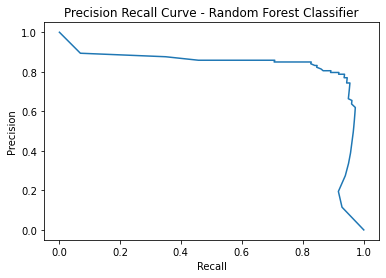

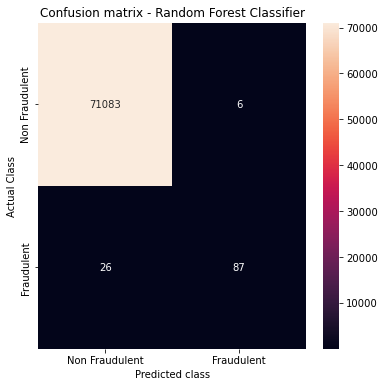

In [50]:
print("Random Forest Classifier")
print("========================")
print("Accuracy: ",accuracy_score(y_test.flatten(), top_random_Tree_Pred)) 
print("Precision: ",precision_score(y_test.flatten(), top_random_Tree_Pred))
print("Recall: ",recall_score(y_test.flatten(), top_random_Tree_Pred))
print("F1-Score: ",f1_score(y_test.flatten(), top_random_Tree_Pred))
print("AUC score: ",roc_auc_score(y_test.flatten(), top_random_Tree_Pred))
print(classification_report(y_test.flatten(), top_random_Tree_Pred,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_test.flatten(), top_random_Tree_Pred_Proba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Random Forest Classifier')

confusion_Matrix = confusion_matrix(y_test.flatten(), top_random_Tree_Pred) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusion_Matrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Random Forest Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show()

## Hyperparameter Tuning

In [51]:
# We use GridSearchCV to tune our model's parameters.

top_random_Tree_Model.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [52]:
# Create the GridSearchCV model.
# Create the GridSearch estimator along with a parameter object containing the values to adjust.

top_random_Tree_Param_Grid = {'n_estimators': [100, 200],
                           'criterion': ['gini','entropy'],
                           'class_weight': ["balanced","balanced_subsample", None],
                           'max_features': ['auto','sqrt','log2',None],
                          }
top_random_Tree_Grid = GridSearchCV(top_random_Tree_Model, top_random_Tree_Param_Grid, verbose=3)

In [53]:
# We train the model with GridSearch.

top_random_Tree_Grid.fitt(top_X_train_scaled, top_y_train.flatten())

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=100;, score=1.000 total time=  26.2s
[CV 2/5] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=100;, score=0.999 total time=  26.7s
[CV 3/5] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=100;, score=0.999 total time=  25.8s
[CV 4/5] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=100;, score=1.000 total time=  28.6s
[CV 5/5] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=100;, score=0.999 total time=  29.0s
[CV 1/5] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200;, score=1.000 total time=  56.1s
[CV 2/5] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200;, score=0.999 total time=  57.8s
[CV 3/5] END class_weight=balanced, criterion=gini, max_features=auto, n_estimators=200;, s

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample',
                                          None],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'n_estimators': [100, 200]},
             verbose=3)

In [54]:
print(top_random_Tree_Grid.best_params_)
print(top_random_Tree_Grid.best_score_)

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 100}
0.9995458907797102


In [55]:
# Making predictions by implementing the hyperparameter tuned model.

top_random_Tree_Grid_Pred = top_random_Tree_Grid.predict(top_X_test_scaled)

In [56]:
print(classification_report(top_y_test.flatten(), top_random_Tree_Grid_Pred,
                            target_names=["Non Fraudulent", "Fraudulent"]))

                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00     71089
    Fraudulent       0.94      0.78      0.85       113

      accuracy                           1.00     71202
     macro avg       0.97      0.89      0.93     71202
  weighted avg       1.00      1.00      1.00     71202



In [57]:
top_hypertuned_random_Tree_Model = RandomForestClassifier(criterion = 'entropy', 
                                                       max_features = 'sqrt', 
                                                       n_estimators = 200, 
                                                       class_weight = None)
top_hypertuned_random_Tree_Model

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=200)

In [58]:
top_hypertuned_random_Tree_Model.fit(top_X_train_scaled, top_y_train.flatten())

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=200)

In [59]:
print(f"Training Data Score: {top_hypertuned_random_Tree_Model.score(top_X_train_scaled, top_y_train)}")
print(f"Testing Data Score: {top_hypertuned_random_Tree_Model.score(top_X_test_scaled, top_y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.9995084407741356


In [61]:
top_hypertuned_random_Tree_Model_Pred = top_hypertuned_random_Tree_Model.predict(top_X_test_scaled)

In [62]:
top_hypertuned_random_Tree_Model_Pred_Proba = top_hypertuned_random_Tree_Model.predict_proba(top_X_test_scaled)[:,1]

In [63]:
print(classification_report(top_y_test.flatten(), top_hypertuned_random_Tree_Model_Pred,
                            target_names=["Non Fraudulent", "Fraudulent"]))

                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00     71089
    Fraudulent       0.90      0.78      0.83       113

      accuracy                           1.00     71202
     macro avg       0.95      0.89      0.92     71202
  weighted avg       1.00      1.00      1.00     71202



Random Forest Classifier
Accuracy:  0.9995084407741356
Precision:  0.8979591836734694
Recall:  0.7787610619469026
F1-Score:  0.8341232227488151
AUC score:  0.8893101966038582
                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00     71089
    Fraudulent       0.90      0.78      0.83       113

      accuracy                           1.00     71202
     macro avg       0.95      0.89      0.92     71202
  weighted avg       1.00      1.00      1.00     71202



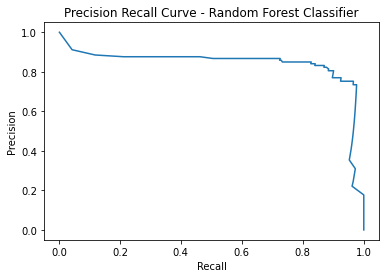

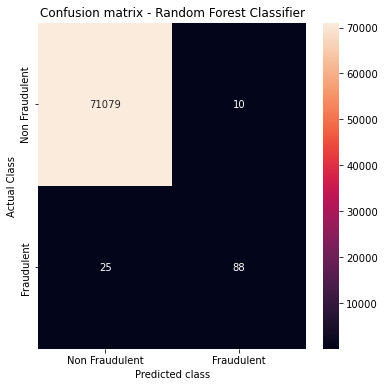

In [64]:
print("Random Forest Classifier")
print("========================")
print("Accuracy: ",accuracy_score(y_test.flatten(), top_hypertuned_random_Tree_Model_Pred)) 
print("Precision: ",precision_score(y_test.flatten(), top_hypertuned_random_Tree_Model_Pred))
print("Recall: ",recall_score(y_test.flatten(), top_hypertuned_random_Tree_Model_Pred))
print("F1-Score: ",f1_score(y_test.flatten(), top_hypertuned_random_Tree_Model_Pred))
print("AUC score: ",roc_auc_score(y_test.flatten(), top_hypertuned_random_Tree_Model_Pred))
print(classification_report(y_test.flatten(), top_hypertuned_random_Tree_Model_Pred,
                            target_names=["Non Fraudulent", "Fraudulent"]))
p, r, t = precision_recall_curve(y_test.flatten(), top_hypertuned_random_Tree_Model_Pred_Proba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Random Forest Classifier')
confusion_Matrix = confusion_matrix(y_test.flatten(), top_hypertuned_random_Tree_Model_Pred) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusion_Matrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Random Forest Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show()

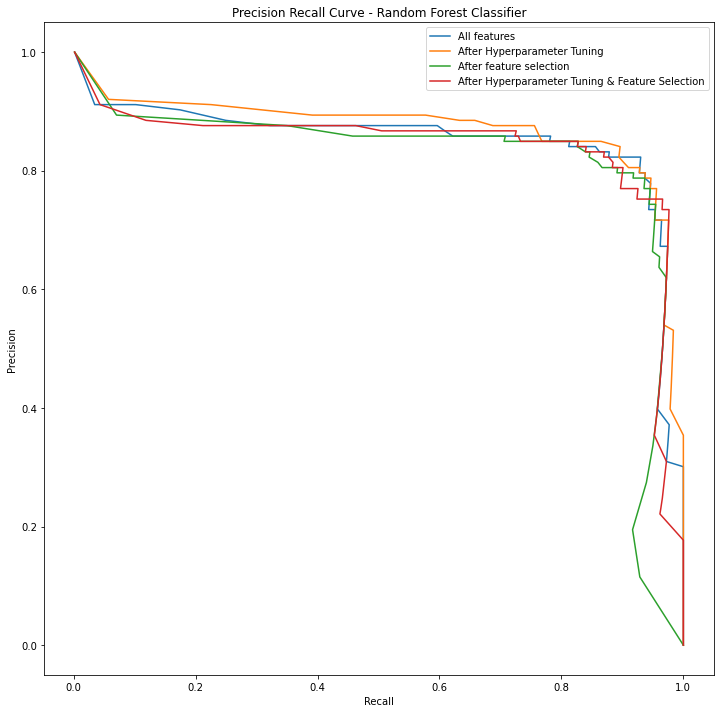

In [65]:
plt.figure(figsize =(12, 12)) 
p, r, t = precision_recall_curve(y_test.flatten(), random_Tree_Pred_Proba)
plt.plot(p, r, label="All features")
p, r, t = precision_recall_curve(y_test.flatten(), random_Tree_Grid_Pred_Proba)
plt.plot(p, r, label="After Hyperparameter Tuning")
p, r, t = precision_recall_curve(y_test.flatten(), top_random_Tree_Pred_Proba)
plt.plot(p, r, label="After feature selection")
p, r, t = precision_recall_curve(y_test.flatten(), top_hypertuned_random_Tree_Model_Pred_Proba)
plt.plot(p, r, label="After Hyperparameter Tuning & Feature Selection")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Random Forest Classifier')
plt.legend()
plt.show()

## Save the Model

In [66]:
filename = 'RandomForestClassifierModel.sav'
joblib.dump(top_random_Tree_Model, filename)

['RandomForestClassifierModel.sav']